<a href="https://colab.research.google.com/github/Killerfish8/Thesis/blob/main/Warehouse_and_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**Warehouse and Retail Sales:-**           




This research aims to analyze trends and interpret sales and movement data across various items and departments in both warehouse and retail settings. The dataset used consists of monthly records detailing sales and transfers by item and department. By exploring this dataset, the study seeks to uncover significant patterns, correlations, and insights crucial for optimizing inventory management, refining sales strategies, and enhancing supplier relationships.

The analysis will encompass identifying seasonal trends, evaluating the performance of different item types and departments, and assessing the impact of retail transfers on sales outcomes. Insights gained from this research will aid stakeholders in making informed decisions to improve operational efficiencies and strategic planning within the supply chain.

**Exoloratory Data Analysis**

In [91]:
import pandas as pd # pandas: This library is used for data manipulation and analysis. It provides data structures like DataFrames which make it easy to work with structured data.
import numpy as np # numpy: This library is used for numerical operations on arrays. It provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt  # matplotlib.pyplot: This is a plotting library used for creating static, interactive, and animated visualizations in Python. It's widely used for generating plots, histograms, bar charts, and other types of visualizations.
import seaborn as sns # seaborn: This is a statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [92]:
# Reading a CSV file into a pandas DataFrame
df = pd.read_csv('/content/Warehouse_and_Retail_Sales_20240618.csv')
# pd.read_csv: This function is used to read a comma-separated values (CSV) file into a pandas DataFrame.

In [93]:
# Displaying the first 5 rows of the DataFrame
print(df.head(5))
# df.head(5): This method displays the first 5 rows of the DataFrame 'df'.
# It's useful for quickly inspecting the structure and content of the data.

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE         0.00   
1            MOMENT DE PLAISIR - 750ML      WINE         0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER         0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE         0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE         0.82   

  RETAIL TRANSFERS WAREHOUSE SALES  
0             0.00            2.00  
1             1.00            4.00  
2             0.00            1.00  
3             0.00            1.00  
4             0.00            0.00  


In [94]:
# Displaying the last 5 rows of the DataFrame
print(df.tail(5))
# df.tail(5): This method displays the last 5 rows of the DataFrame 'df'.
# It's useful for checking the end of the dataset and ensuring completeness.

        YEAR  MONTH                             SUPPLIER ITEM CODE  \
307640  2020      9              BOSTON BEER CORPORATION     98868   
307641  2020      9  GLOBAL OCEAN AND AIR CARGO SERVICES     98884   
307642  2020      9                         HEINEKEN USA     98906   
307643  2020      9              RELIABLE CHURCHILL LLLP     98914   
307644  2020      9                CONSTANTINE WINES INC     98930   

                     ITEM DESCRIPTION ITEM TYPE RETAIL SALES RETAIL TRANSFERS  \
307640     SAM ADAMS OCTOBERFEST 1/6K      KEGS         0.00             0.00   
307641      HARAR BEER 4/6NR - 11.2OZ      BEER         1.50             1.00   
307642           DOS EQUIS LAGER 1/2K      KEGS         0.00             0.00   
307643    LINDEMANS KRIEK NR - 25.4OZ      BEER         0.00             0.00   
307644  ARIS GREEK LAGER 4/6NR - 11OZ      BEER         0.00             0.00   

       WAREHOUSE SALES  
307640           54.00  
307641            8.00  
307642           

In [95]:
# Displaying the column names of the DataFrame
print(df.columns)
# df.columns: This attribute returns the column labels of the DataFrame 'df'.
# It's useful for getting an overview of all the columns present in the dataset.

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')


In [96]:
# Displaying the shape of the DataFrame
print(df.shape)
# df.shape: This attribute returns a tuple representing the dimensionality of the DataFrame 'df'.
# The tuple contains two elements: the number of rows and the number of columns in the DataFrame.
# Calling print() ensures that the shape tuple is displayed immediately.

(307645, 9)


In [97]:
# Displaying the concise summary of the DataFrame
print(df.info())
# df.info(): This method provides a concise summary of the DataFrame 'df'.
# It includes information about the number of entries (rows), each column's data type, and memory usage.
# Calling print() ensures that the summary is displayed immediately.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   YEAR              307645 non-null  int64 
 1   MONTH             307645 non-null  int64 
 2   SUPPLIER          307478 non-null  object
 3   ITEM CODE         307645 non-null  object
 4   ITEM DESCRIPTION  307645 non-null  object
 5   ITEM TYPE         307644 non-null  object
 6   RETAIL SALES      307642 non-null  object
 7   RETAIL TRANSFERS  307645 non-null  object
 8   WAREHOUSE SALES   307645 non-null  object
dtypes: int64(2), object(7)
memory usage: 21.1+ MB
None


In [98]:
# Displaying the data types of each column in the DataFrame
print(df.dtypes)
# df.dtypes: This attribute returns the data type of each column in the DataFrame 'df'.
# It's useful for understanding how pandas has interpreted the data types from the CSV file.

YEAR                 int64
MONTH                int64
SUPPLIER            object
ITEM CODE           object
ITEM DESCRIPTION    object
ITEM TYPE           object
RETAIL SALES        object
RETAIL TRANSFERS    object
WAREHOUSE SALES     object
dtype: object


In [99]:
# Renaming the column names
df.rename(columns={'YEAR' : 'Year',
                        'MONTH' : 'Month',
                        'SUPPLIER' : 'Supplier',
                        'ITEM CODE' : 'Item_Code',
                        'ITEM DESCRIPTION' : 'Item_Description',
                        'ITEM TYPE' : 'Item_Type',
                        'RETAIL SALES' : 'Retail_Sales',
                        'RETAIL TRANSFERS' : 'Retail_Transfers',
                        'WAREHOUSE SALES' : 'Warehouse_Sales'}, inplace=True)

In [100]:
# Displaying summary statistics of the DataFrame
print(df.describe())
# df.describe(): This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the numerical columns in the DataFrame 'df'.
# It provides statistics such as count, mean, standard deviation, minimum, maximum, and various quantiles (25%, 50%, and 75%).
# This is particularly useful for gaining insights into the distribution and variability of numerical data in your dataset.
# Calling print() ensures that the summary statistics are displayed immediately.

                Year          Month
count  307645.000000  307645.000000
mean     2018.438525       6.423862
std         1.083061       3.461812
min      2017.000000       1.000000
25%      2017.000000       3.000000
50%      2019.000000       7.000000
75%      2019.000000       9.000000
max      2020.000000      12.000000


In [101]:
# Finding unique values in the 'Item_Type' column
unique_items = df['Item_Type'].unique()
# Printing unique values
print("All Unique Items:\n")
print(unique_items)

All Unique Items:

['WINE' 'BEER' 'LIQUOR' 'STR_SUPPLIES' 'KEGS' 'REF' 'DUNNAGE'
 'NON-ALCOHOL' nan]


In [102]:
# Assuming df is already loaded from a CSV file as shown earlier
# Counting duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()
# df.duplicated(): This method returns a boolean Series indicating duplicate rows in the DataFrame.
# Each row is marked as True if it is a duplicate of a previous row; otherwise, it is marked as False.
# sum(): This function sums up the True values (which represent duplicates) in the boolean Series, giving the total count of duplicate rows.
print("Number of duplicate rows in the DataFrame:", duplicate_count)

Number of duplicate rows in the DataFrame: 0


In [103]:
# Assuming df is already loaded from a CSV file as shown earlier
# Counting missing values in each column of the DataFrame
missing_values_count = df.isna().sum()
# df.isna(): This method returns a boolean DataFrame where each cell is True if the corresponding element is NaN, and False otherwise.
# sum(): This function sums up the True values (which represent missing values) along each column axis, giving the total count of missing values in each column.
print("Missing values in each column:")
print(missing_values_count)

Missing values in each column:
Year                  0
Month                 0
Supplier            167
Item_Code             0
Item_Description      0
Item_Type             1
Retail_Sales          3
Retail_Transfers      0
Warehouse_Sales       0
dtype: int64


In [104]:
df.dropna(axis=0, inplace=True)
# Using dropna() with inplace=True is efficient for quickly cleaning up your DataFrame by removing rows or columns with missing values before proceeding with analysis or modeling.

In [105]:
df.isna().sum()

Year                0
Month               0
Supplier            0
Item_Code           0
Item_Description    0
Item_Type           0
Retail_Sales        0
Retail_Transfers    0
Warehouse_Sales     0
dtype: int64

In [106]:
df.columns

Index(['Year', 'Month', 'Supplier', 'Item_Code', 'Item_Description',
       'Item_Type', 'Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales'],
      dtype='object')

In [107]:
# Convert YEAR and MONTH to datetime
df['DATE'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
# Check data types
print(df.dtypes)

Year                         int64
Month                        int64
Supplier                    object
Item_Code                   object
Item_Description            object
Item_Type                   object
Retail_Sales                object
Retail_Transfers            object
Warehouse_Sales             object
DATE                datetime64[ns]
dtype: object


In [108]:
# Convert numerical columns to appropriate data types
numeric_columns = ['Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales']
# Check data types
print(df.dtypes)

Year                         int64
Month                        int64
Supplier                    object
Item_Code                   object
Item_Description            object
Item_Type                   object
Retail_Sales                object
Retail_Transfers            object
Warehouse_Sales             object
DATE                datetime64[ns]
dtype: object


In [109]:
# Handle invalid literals and convert to float
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

In [110]:
# Ensure non-numeric columns are not included in the sum
numeric_df = df[numeric_columns + ['Year', 'Month']]

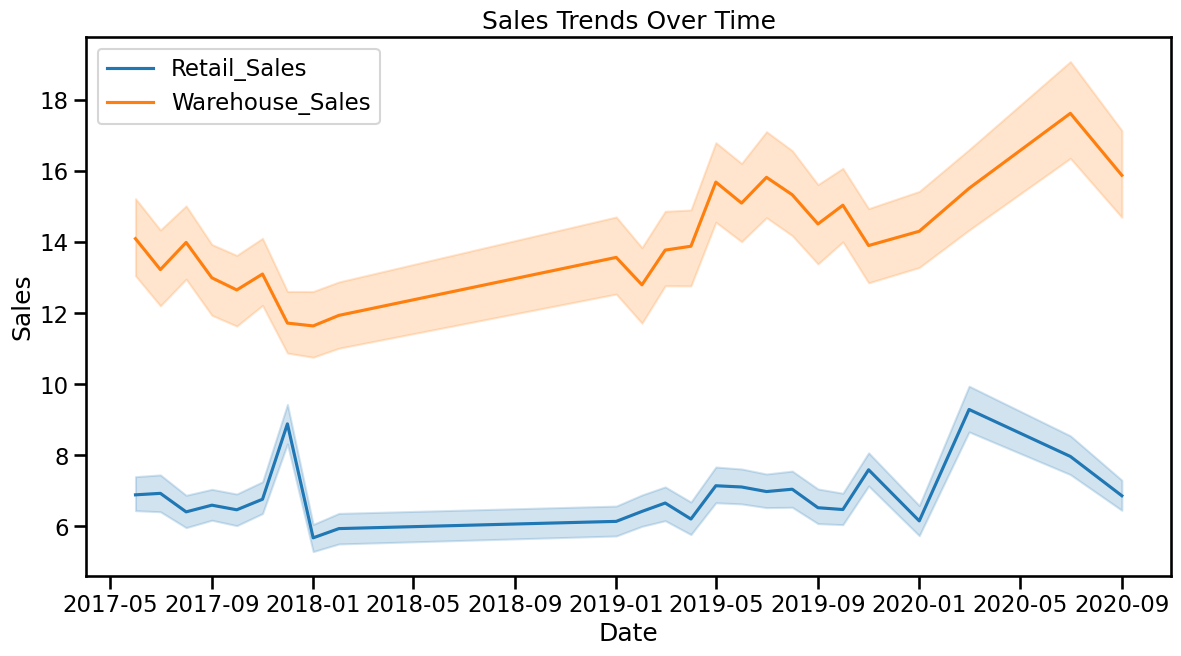

In [111]:
# Sales trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='DATE', y='Retail_Sales', label='Retail_Sales')
sns.lineplot(data=df, x='DATE', y='Warehouse_Sales', label='Warehouse_Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

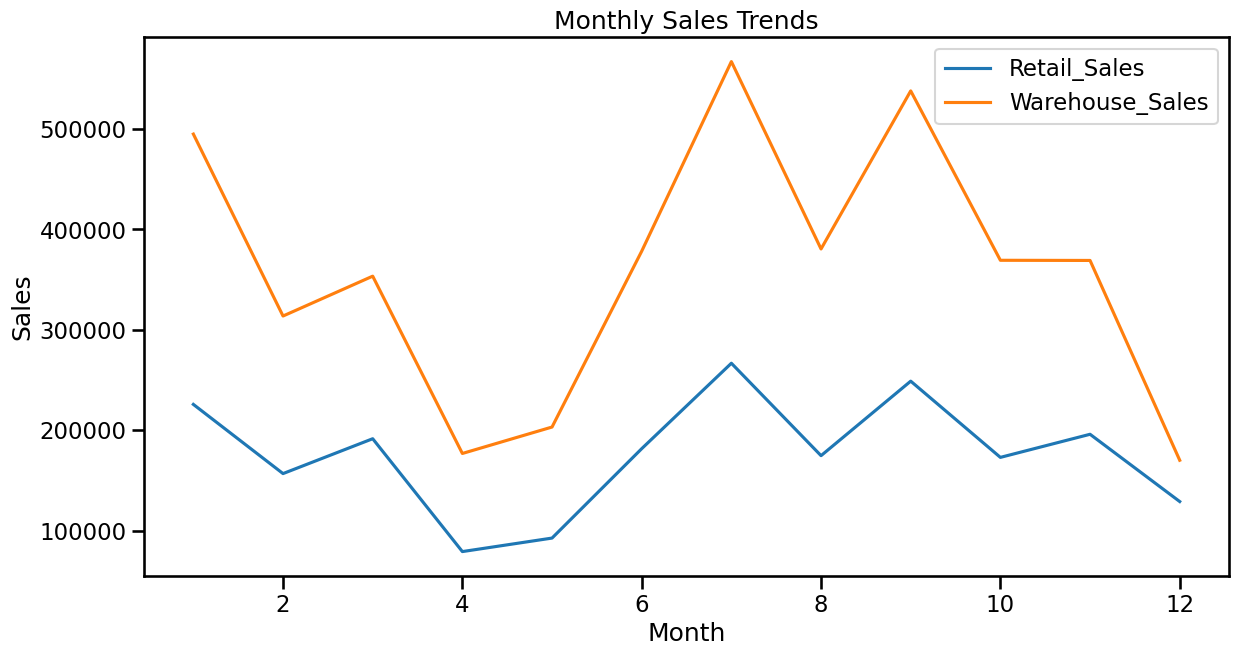

In [112]:
# Monthly sales trends
monthly_sales = numeric_df.groupby('Month').sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Retail_Sales', label='Retail_Sales')
sns.lineplot(data=monthly_sales, x='Month', y='Warehouse_Sales', label='Warehouse_Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

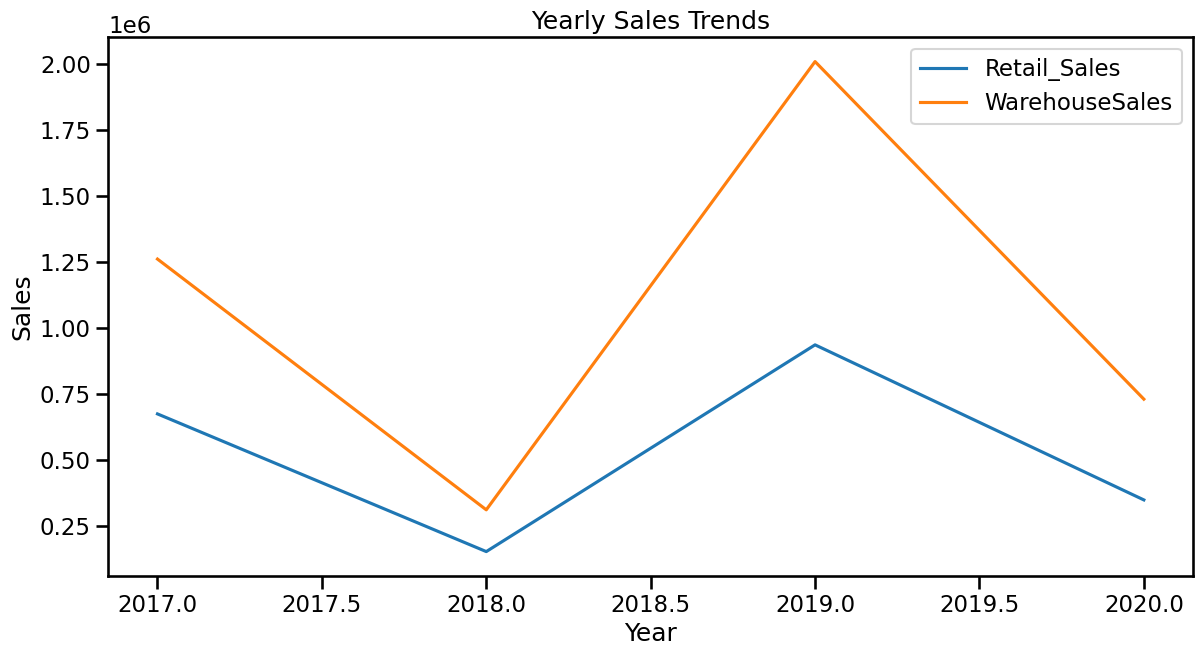

In [113]:
# Yearly sales trends
yearly_sales = numeric_df.groupby('Year').sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_sales, x='Year', y='Retail_Sales', label='Retail_Sales')
sns.lineplot(data=yearly_sales, x='Year', y='Warehouse_Sales', label='WarehouseSales')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [114]:
df.columns

Index(['Year', 'Month', 'Supplier', 'Item_Code', 'Item_Description',
       'Item_Type', 'Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales',
       'DATE'],
      dtype='object')

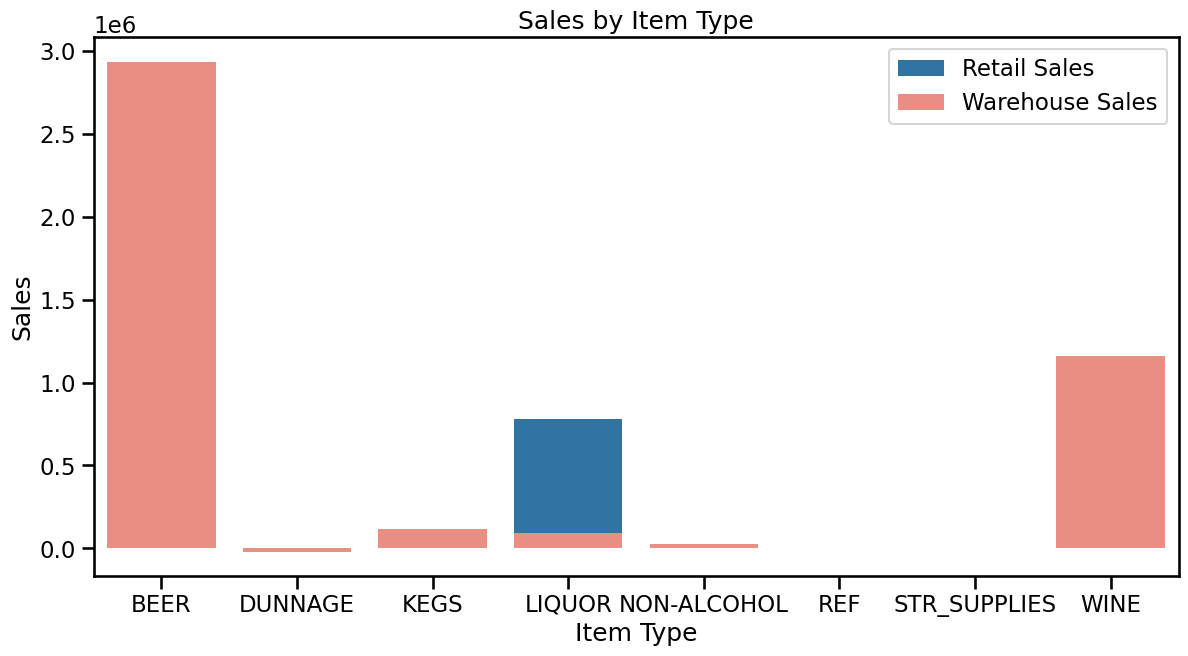

In [115]:
# Sales by Item Type
item_sales = df.groupby('Item_Type')[numeric_columns].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=item_sales, x='Item_Type', y='Retail_Sales', label='Retail Sales')
sns.barplot(data=item_sales, x='Item_Type', y='Warehouse_Sales', label='Warehouse Sales', color='salmon')
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

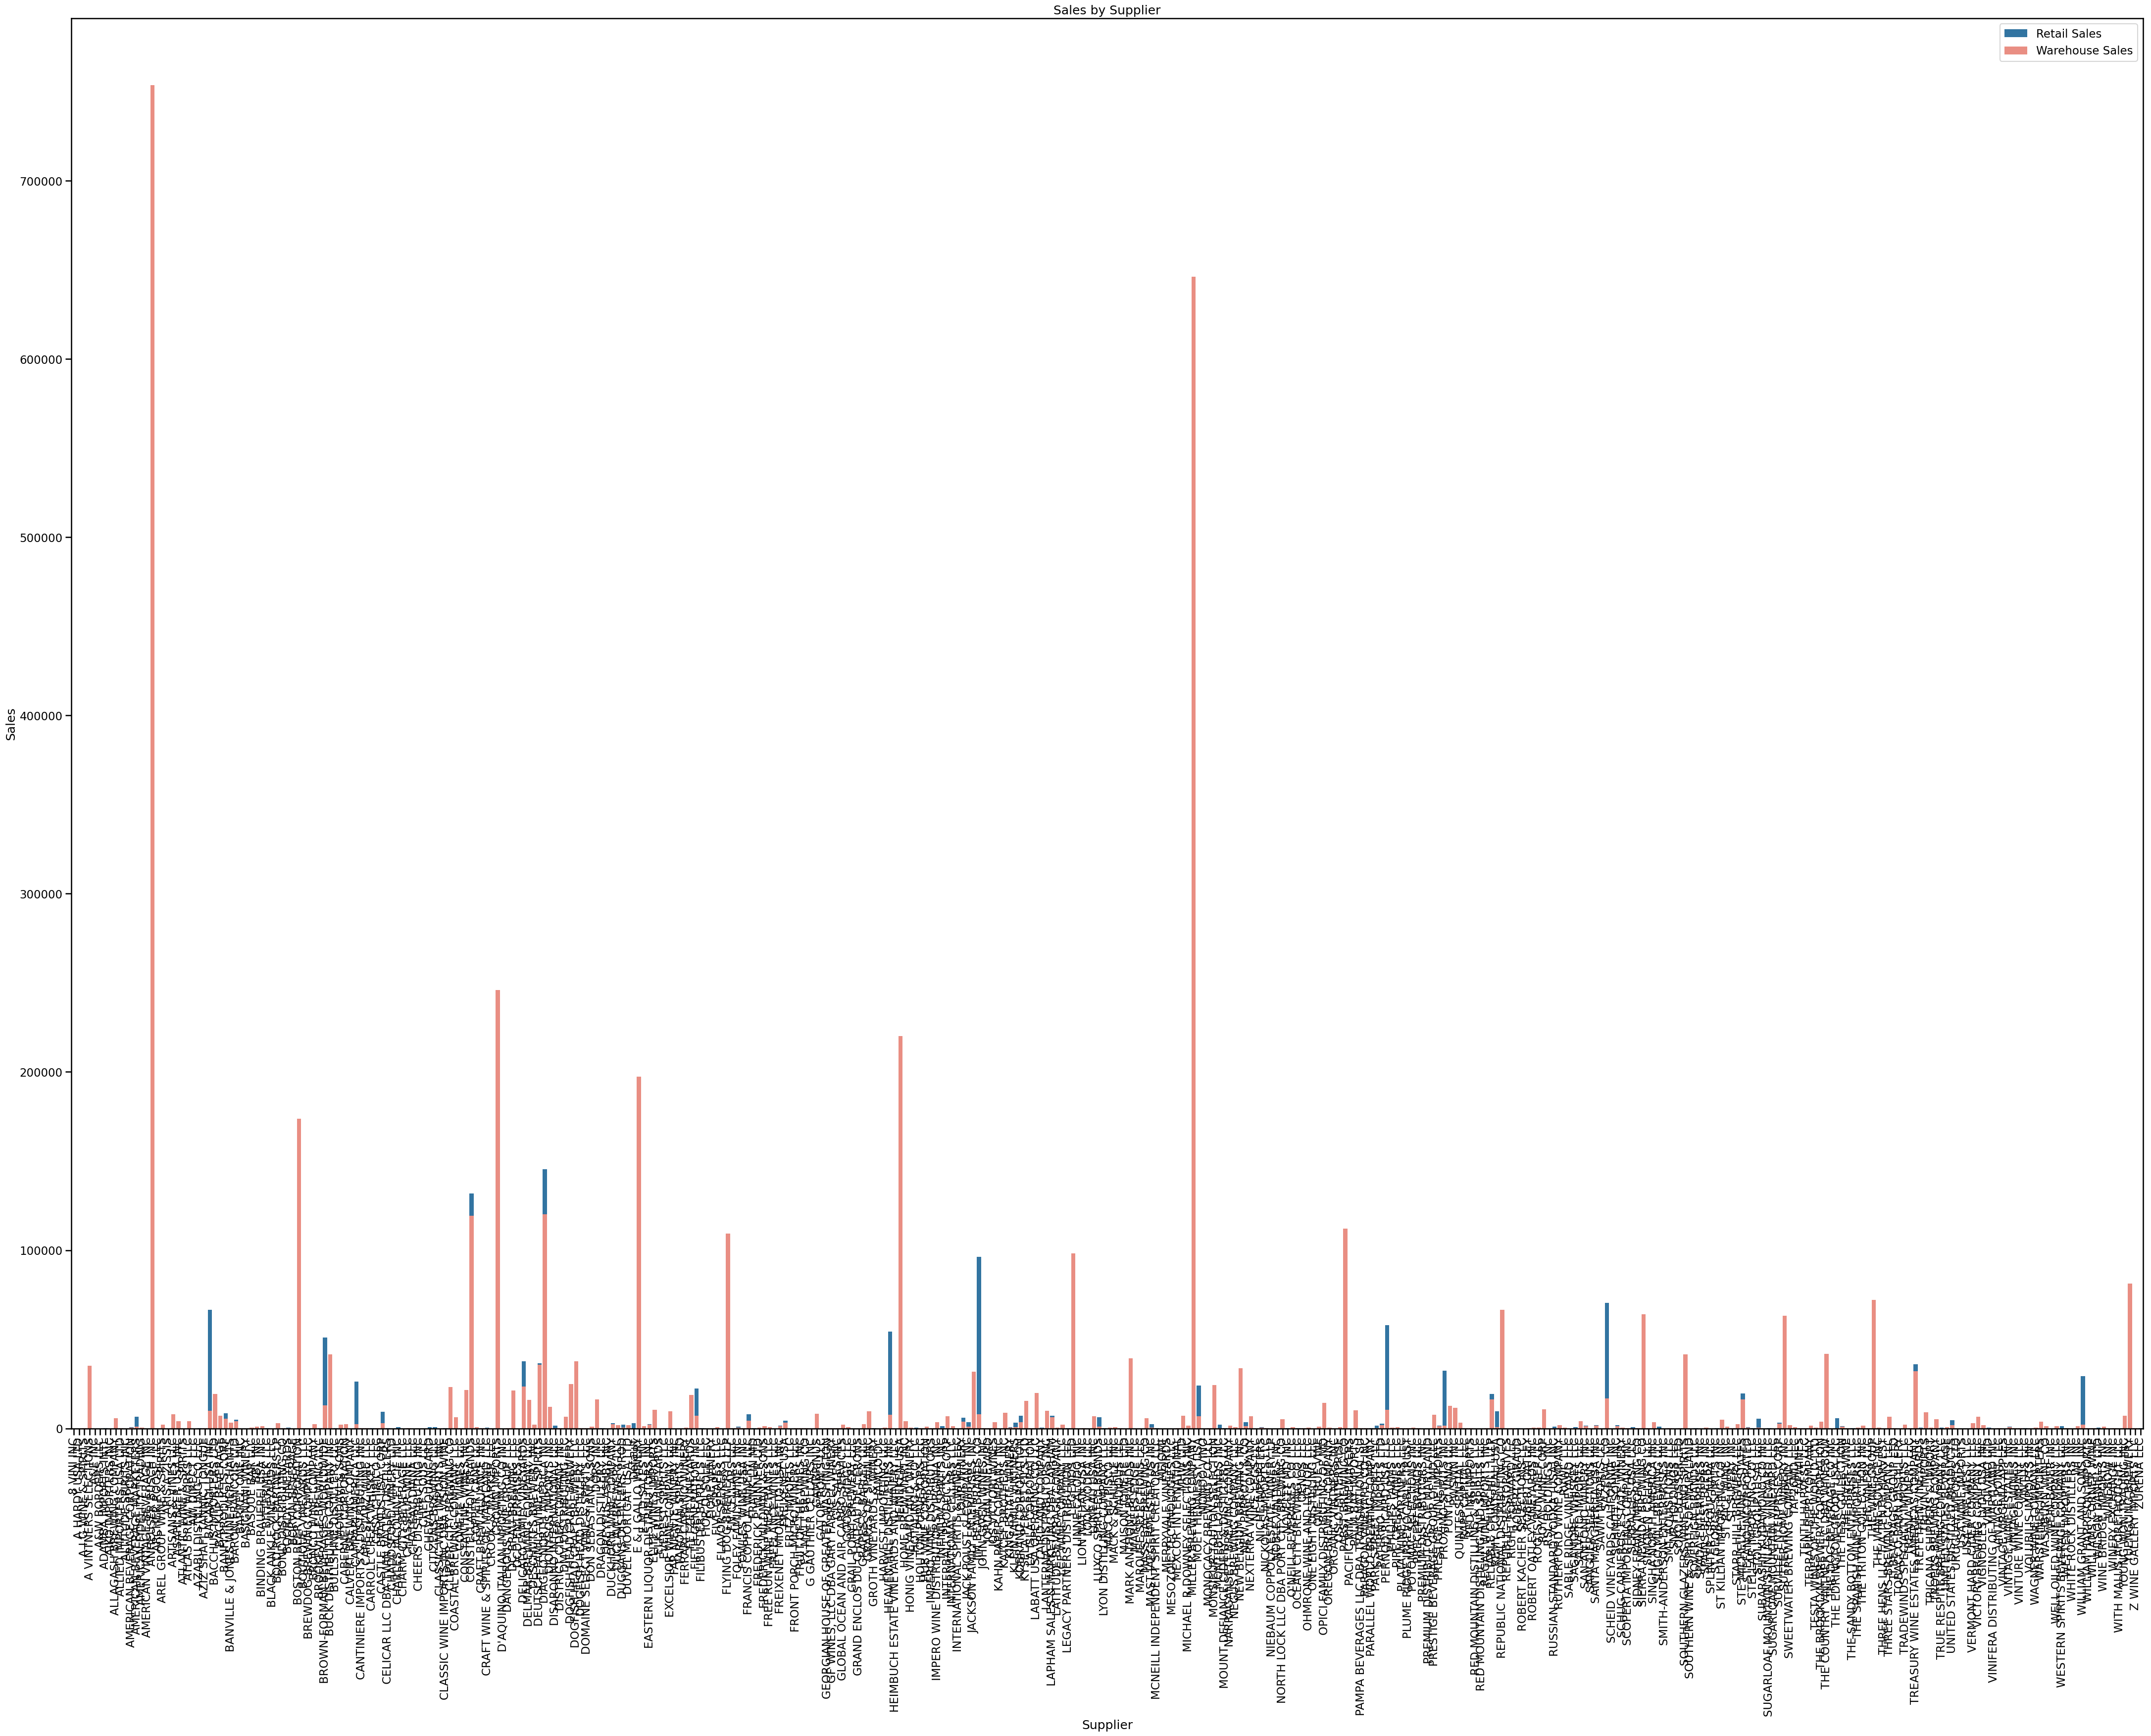

In [116]:
# Sales by Supplier
supplier_sales = df.groupby('Supplier')[numeric_columns].sum().reset_index()
plt.figure(figsize=(54, 37))
sns.barplot(data=supplier_sales, x='Supplier', y='Retail_Sales', label='Retail Sales')
sns.barplot(data=supplier_sales, x='Supplier', y='Warehouse_Sales', label='Warehouse Sales', color='salmon')
plt.title('Sales by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Item Wise Count 

Item_Type
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64


Text(0.5, 0, 'Item Type')

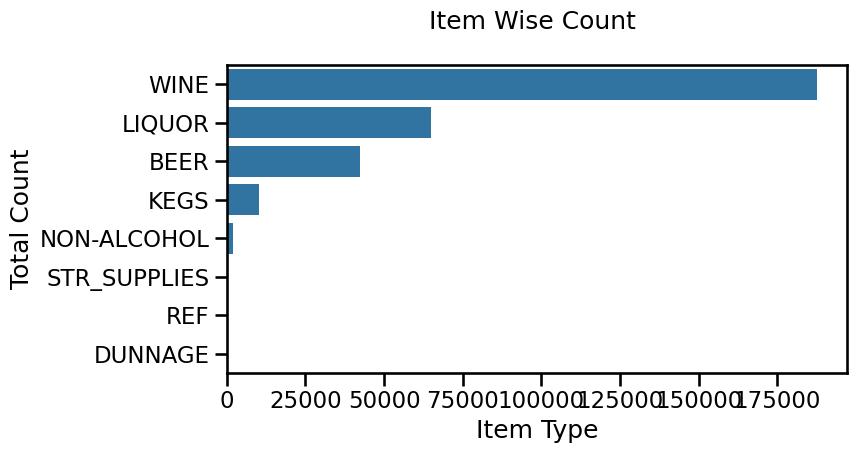

In [117]:
# Item wise count
DataSet = df.dropna()
ItemCount = DataSet["Item_Type"].value_counts().nlargest(10)
print("Item Wise Count \n")
print(ItemCount)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(8,4))
sns.countplot(DataSet['Item_Type'],order = DataSet['Item_Type'].value_counts().index)
plt.title('Item Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Item Type')

<Axes: xlabel='Item_Type'>

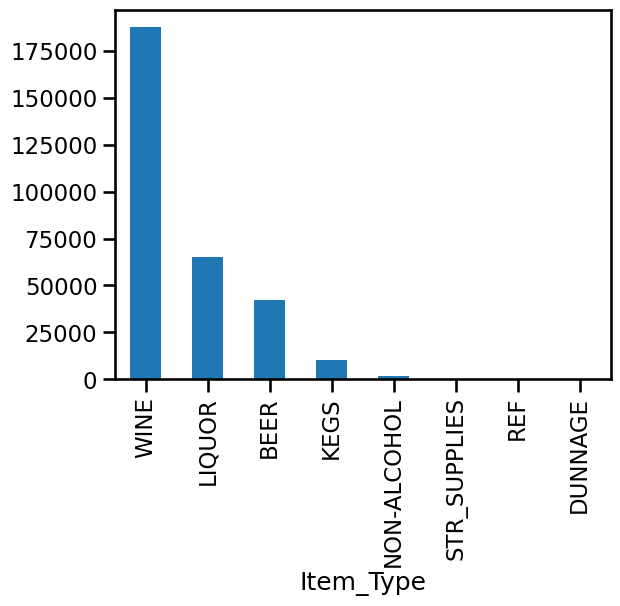

In [118]:
df['Item_Type'].value_counts().plot(kind="bar")


In [119]:
df.columns

Index(['Year', 'Month', 'Supplier', 'Item_Code', 'Item_Description',
       'Item_Type', 'Retail_Sales', 'Retail_Transfers', 'Warehouse_Sales',
       'DATE'],
      dtype='object')

,Supplier,Retail_Sales
0,E & J GALLO WINERY,166170.53
1,DIAGEO NORTH AMERICA INC,145343.20
2,CONSTELLATION BRANDS,131664.79
3,ANHEUSER BUSCH INC,109960.82
4,JIM BEAM BRANDS CO,96164.04
5,MILLER BREWING COMPANY,87156.44
6,SAZERAC CO,70414.62
7,CROWN IMPORTS,68755.10
8,BACARDI USA INC,66610.23
9,THE WINE GROUP,64270.04


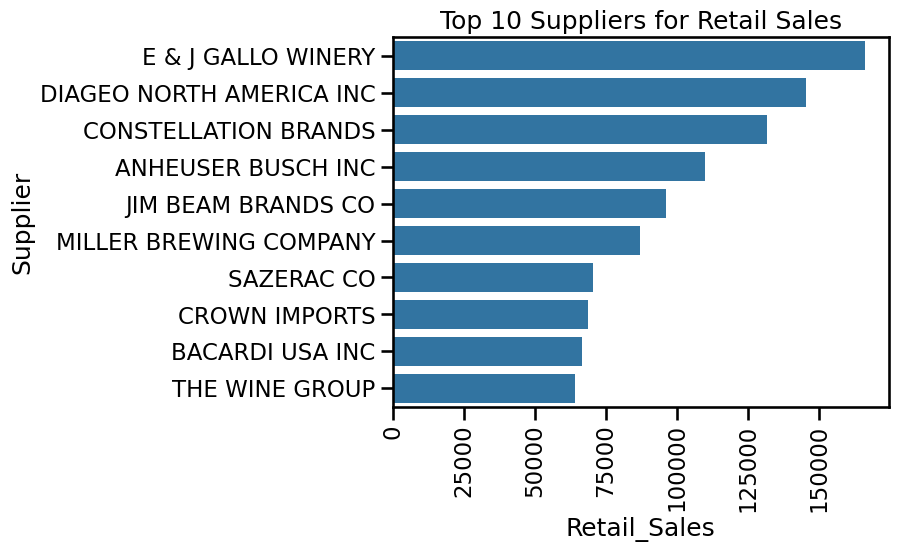

In [120]:
profit=df.groupby("Supplier")['Retail_Sales'].sum().sort_values(ascending=False).reset_index().head(10)
display(profit)
sns.barplot(data=profit,y='Supplier',x='Retail_Sales')
plt.title('Top 10 Suppliers for Retail Sales')
plt.xticks(rotation=90)
plt.show()

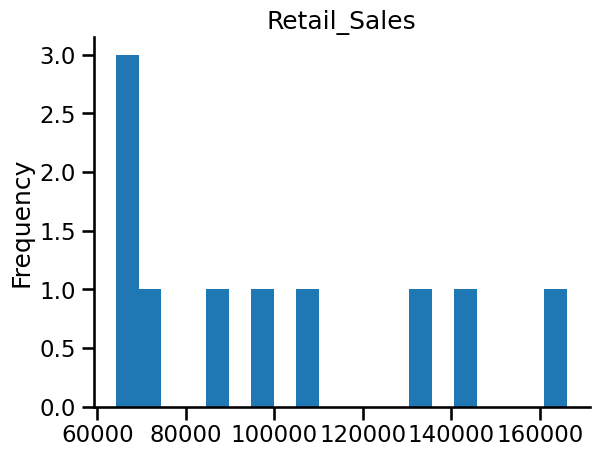

In [121]:
# @title Retail_Sales

from matplotlib import pyplot as plt
profit['Retail_Sales'].plot(kind='hist', bins=20, title='Retail_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

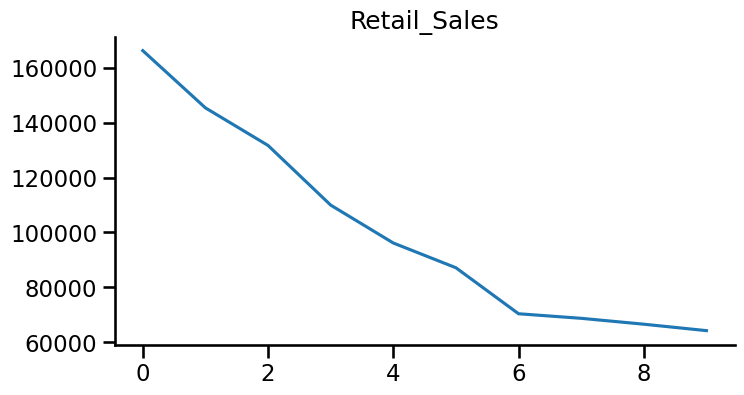

In [122]:
# @title Retail_Sales

from matplotlib import pyplot as plt
profit['Retail_Sales'].plot(kind='line', figsize=(8, 4), title='Retail_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

,Supplier,Warehouse_Sales
0,ANHEUSER BUSCH INC,753542.45
1,MILLER BREWING COMPANY,646021.45
2,CROWN IMPORTS,245843.50
3,HEINEKEN USA,220136.50
4,E & J GALLO WINERY,197463.78
5,BOSTON BEER CORPORATION,173795.93
6,DIAGEO NORTH AMERICA INC,120170.58
7,CONSTELLATION BRANDS,119399.51
8,PABST BREWING CO,111972.19
9,FLYING DOG BREWERY LLLP,109321.32


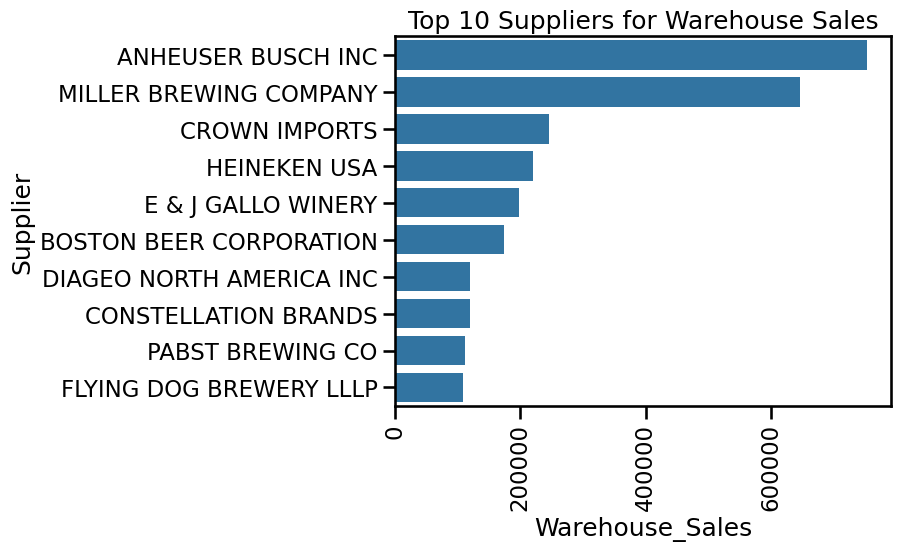

In [123]:
pro=df.groupby("Supplier")['Warehouse_Sales'].sum().sort_values(ascending=False).reset_index().head(10)
display(pro)
sns.barplot(data=pro,y='Supplier',x='Warehouse_Sales')
plt.title('Top 10 Suppliers for Warehouse Sales')
plt.xticks(rotation=90)
plt.show()

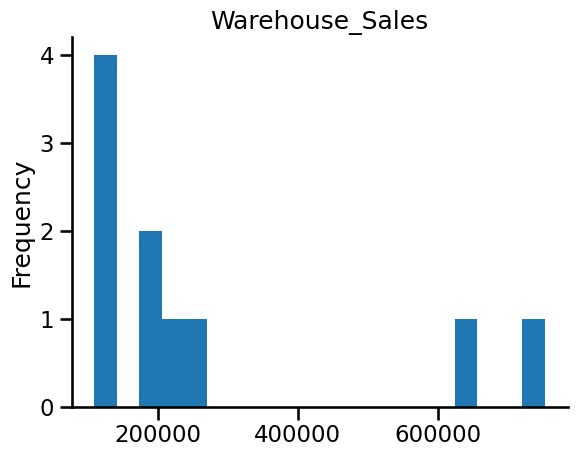

In [124]:
# @title Warehouse_Sales

from matplotlib import pyplot as plt
city_profit['Warehouse_Sales'].plot(kind='hist', bins=20, title='Warehouse_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

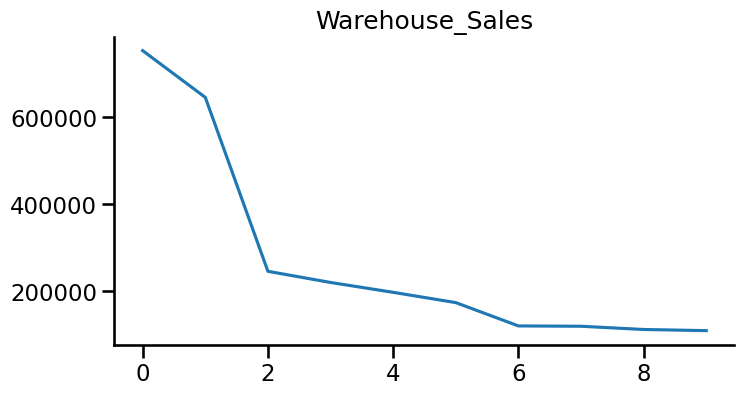

In [125]:
# @title Warehouse_Sales
from matplotlib import pyplot as plt
city_profit['Warehouse_Sales'].plot(kind='line', figsize=(8, 4), title='Warehouse_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 0, 'Item Type')

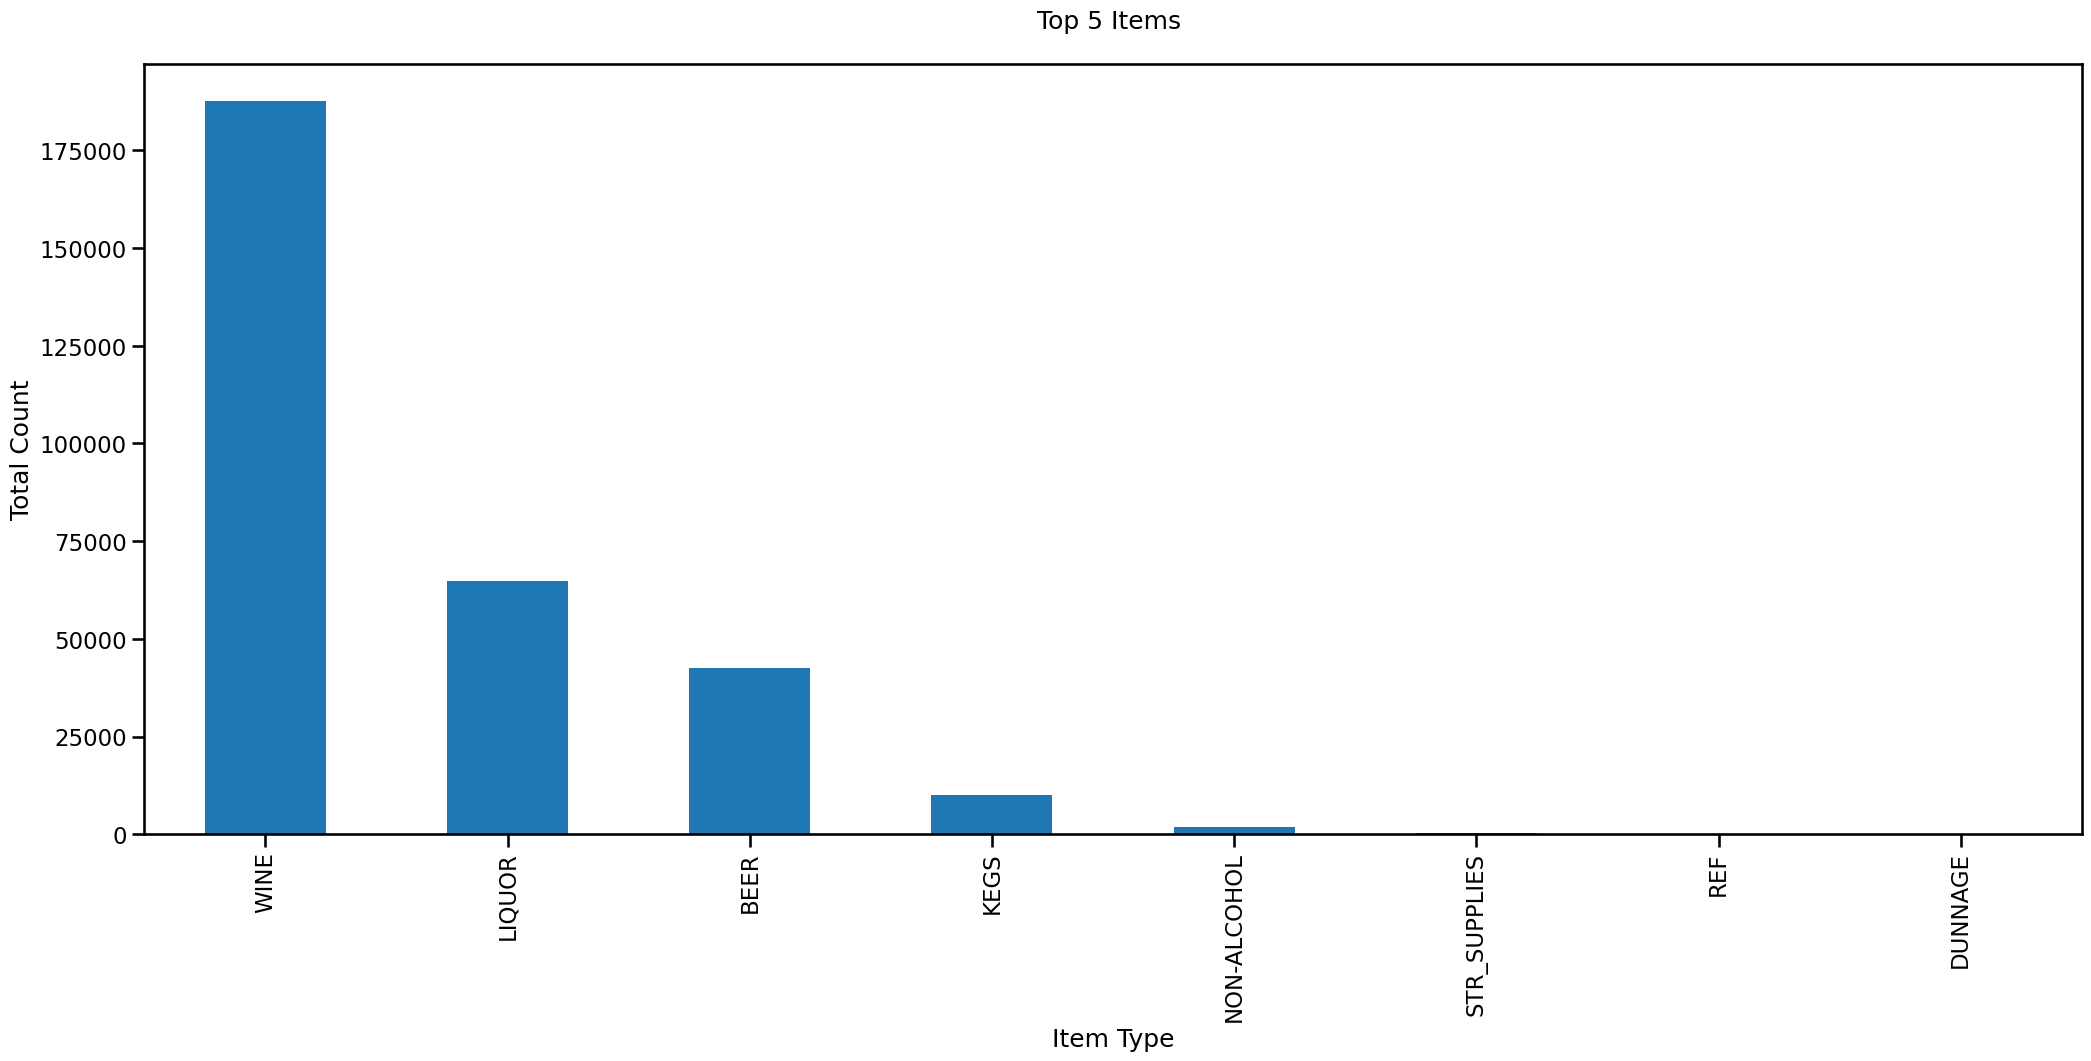

In [132]:
# Top 8 Items in Bar Chart
plt.figure(figsize=(25,10))
GraphData=DataSet.groupby('Item_Type').size().nlargest(8)
GraphData.plot(kind='bar')
plt.title('Top 5 Items \n')
plt.ylabel('Total Count')
plt.xlabel('Item Type')

Text(0, 0.5, 'Item')

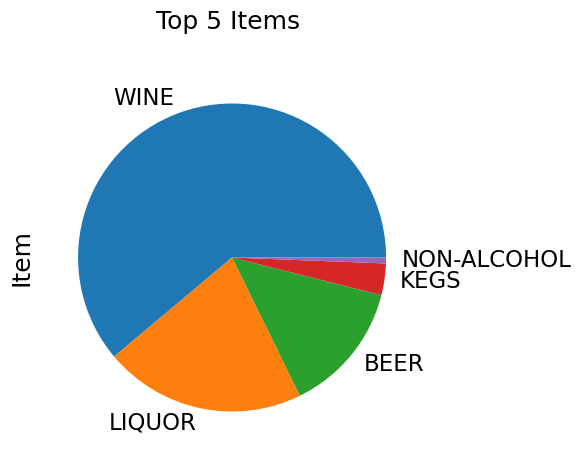

In [133]:
# Draw Pie Chart
plt.figure(figsize=(6,5))
DataSet['Item_Type'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

Top 10 Wine Suppliers 

Supplier
REPUBLIC NATIONAL DISTRIBUTING CO       16864
MONSIEUR TOUTON SELECTION               10326
THE COUNTRY VINTNER, LLC DBA WINEBOW    10151
E & J GALLO WINERY                       9201
A VINTNERS SELECTIONS                    9188
SOUTHERN GLAZERS WINE AND SPIRITS        8758
BACCHUS IMPORTERS LTD                    6770
CONSTELLATION BRANDS                     5615
CONSTANTINE WINES INC                    4838
THE WINE GROUP                           4037
Name: count, dtype: int64


Text(0.5, 0, 'Supplier Name')

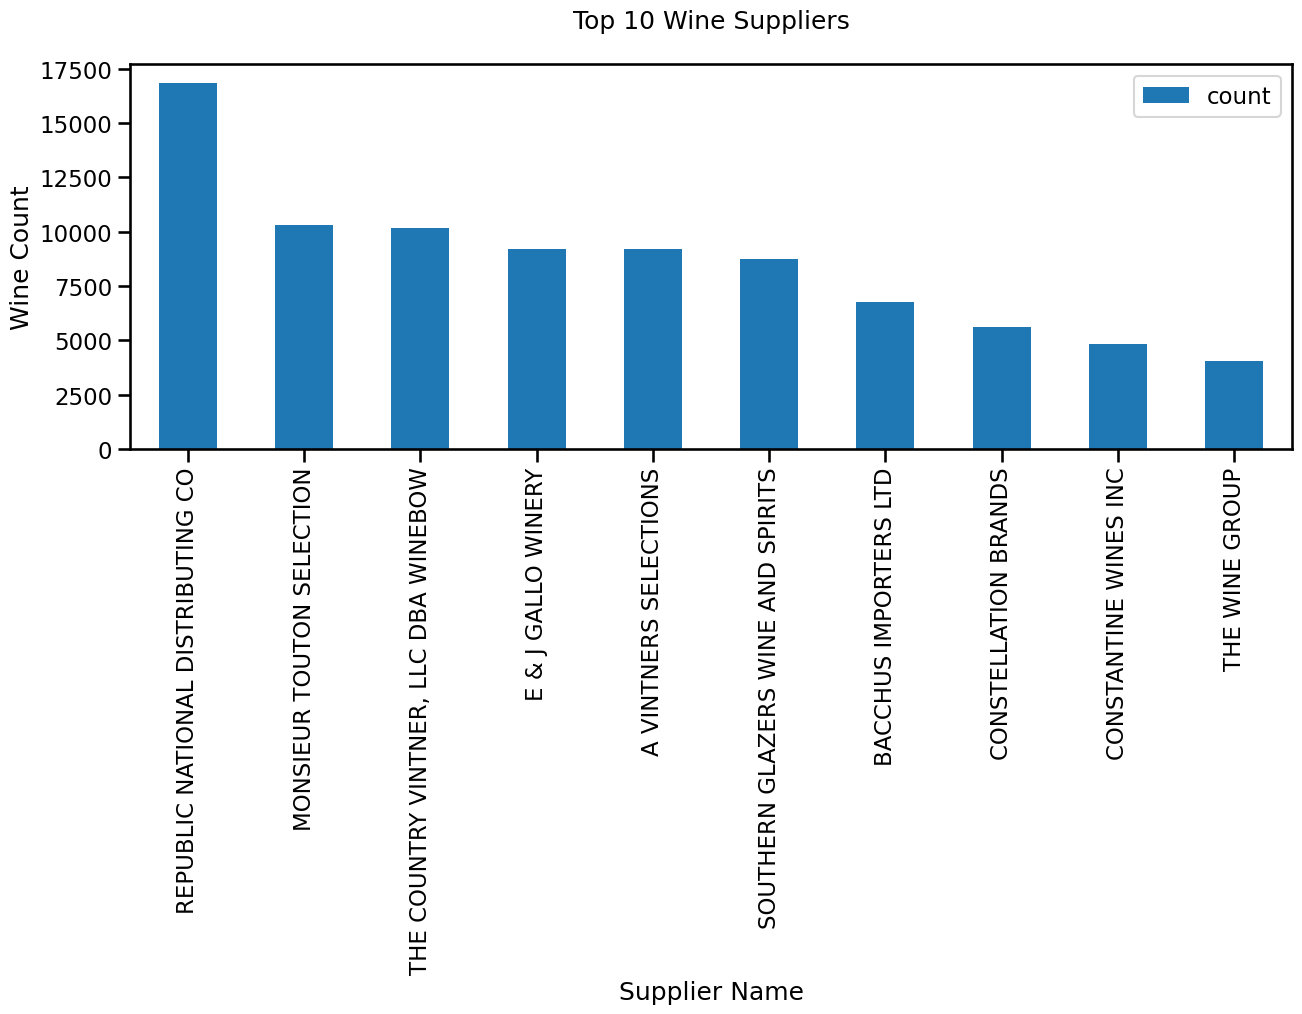

In [128]:
# Top 10 Wine Supplieies in Bar Chart
Item=df[df['Item_Type']=='WINE']
Item[Item["Item_Type"]=='WINE']['Supplier'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,5))
ItemSupplier = Item[Item["Item_Type"]=='WINE']['Supplier'].value_counts()[0:10]
print("Top 10 Wine Suppliers \n")
print(ItemSupplier)
plt.title('Top 10 Wine Suppliers\n')
plt.ylabel('Wine Count')
plt.xlabel('Supplier Name')

                  Retail_Sales  Retail_Transfers  Warehouse_Sales
Retail_Sales          1.000000          0.954297         0.252685
Retail_Transfers      0.954297          1.000000         0.255215
Warehouse_Sales       0.252685          0.255215         1.000000


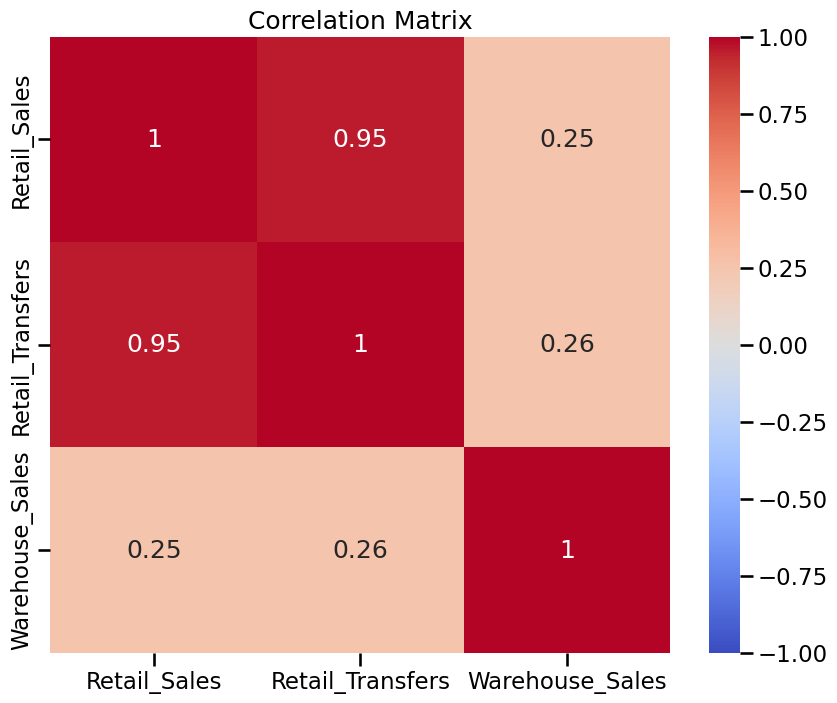

In [129]:
# Correlation Analysis
correlation = df[numeric_columns].corr()
print(correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()